# Exploração e Tratamento dos dados




Imports:


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data:


In [111]:
trainDf = pd.read_csv('training_data.csv')
testDf = pd.read_csv('test_data.csv')

## Exploração


In [112]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [113]:
print(trainDf['city_name'].value_counts())

Guimaraes    5000
Name: city_name, dtype: int64


In [114]:
print(trainDf['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


In [115]:
print(trainDf['magnitude_of_delay'].value_counts())

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64


In [116]:
print(trainDf['avg_rain'].value_counts())

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64


In [117]:
print(trainDf['luminosity'].value_counts())

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64


In [118]:
uniqueRoad = {}

for roads in trainDf["affected_roads"]:   
    for road in str(roads).split(","):
        if uniqueRoad.get(road) == None:
            uniqueRoad[road] = 1
        else:
            uniqueRoad[road] +=1

print(uniqueRoad)

{'': 2968, 'N101': 23460, 'R206': 327, 'N105': 2155, 'N206': 174, 'N309': 199, 'IC5': 108, 'nan': 85, 'N310': 17, 'N207-4': 22, 'IC5 - N206': 1, 'EM579': 16}


count     5000.000000
mean       560.567000
std       1686.859581
min          0.000000
25%          0.000000
50%          0.000000
75%        234.000000
max      31083.000000
Name: delay_in_seconds, dtype: float64

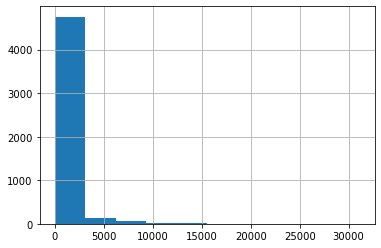

In [119]:
trainDf["delay_in_seconds"].hist()
trainDf["delay_in_seconds"].describe()

count    5000.000000
mean       14.583000
std         4.820514
min         1.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        35.000000
Name: avg_temperature, dtype: float64

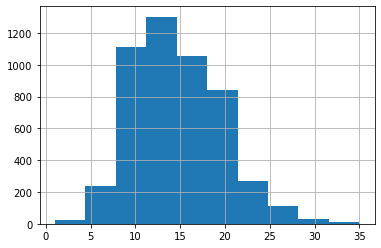

In [120]:
trainDf["avg_temperature"].hist()
trainDf["avg_temperature"].describe()

count    5000.000000
mean     1018.145000
std         5.174372
min       997.000000
25%      1015.000000
50%      1019.000000
75%      1022.000000
max      1032.000000
Name: avg_atm_pressure, dtype: float64

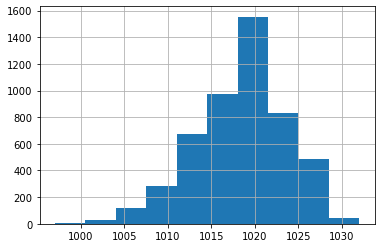

In [121]:
trainDf["avg_atm_pressure"].hist()
trainDf["avg_atm_pressure"].describe()

count    5000.000000
mean       74.455000
std        17.204638
min         6.000000
25%        63.000000
50%        78.000000
75%        90.000000
max       100.000000
Name: avg_humidity, dtype: float64

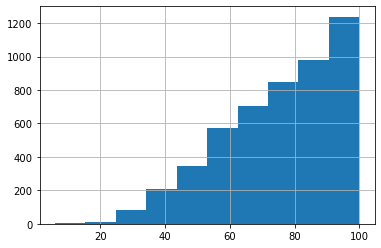

In [122]:
trainDf["avg_humidity"].hist()
trainDf["avg_humidity"].describe()

count    5000.000000
mean        1.253500
std         1.269847
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: avg_wind_speed, dtype: float64

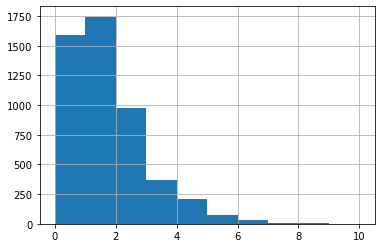

In [123]:
trainDf["avg_wind_speed"].hist()
trainDf["avg_wind_speed"].describe()

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: avg_precipitation, dtype: float64

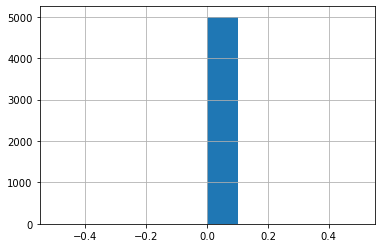

In [124]:
trainDf["avg_precipitation"].hist()
trainDf["avg_precipitation"].describe()

## Tratamento

Label enconding of categorical features, introducing an inherent order

In [125]:
replace_Incident= {'incidents':{'None':0, 'Low':1, 'Medium':2,'High':3,'Very_High':4}}
replace_AvgRain = {'avg_rain':{'Sem Chuva':0, 'chuva fraca':1, 'chuva moderada':2,'chuva forte':3}}
replace_Lumi    = {'luminosity': {'DARK':0,'LOW_LIGHT':1,'LIGHT':2,}}

trainDf.replace(replace_Incident,inplace=True)

trainDf.replace(replace_AvgRain,inplace=True)
testDf.replace(replace_AvgRain,inplace=True)
trainDf.replace(replace_Lumi,inplace=True)
testDf.replace(replace_Lumi,inplace=True)

Date processing:

In [126]:
trainDf['record_date'] = pd.to_datetime(trainDf['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
testDf['record_date']  = pd.to_datetime(testDf['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')

In [127]:
#Separate month
trainDf['record_date_month'] = trainDf['record_date'].dt.month
testDf['record_date_month'] = testDf['record_date'].dt.month

#Separate day
trainDf['record_date_day'] = trainDf['record_date'].dt.day
testDf['record_date_day'] = testDf['record_date'].dt.day

#Separate hour
trainDf['record_date_hour'] = trainDf['record_date'].dt.hour
testDf['record_date_hour'] = testDf['record_date'].dt.hour

#Introduce variable isWeekend
replace_weekend = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
trainDf['record_date_isWeekend'] = trainDf['record_date'].dt.dayofweek
trainDf['record_date_isWeekend'].replace(replace_weekend,inplace=True)
testDf['record_date_isWeekend'] = testDf['record_date'].dt.dayofweek
testDf['record_date_isWeekend'].replace(replace_weekend,inplace=True)

Affected_roads processing

In [128]:
data = []
for roads in trainDf["affected_roads"]:
    roadsList=[0,0,0,0,0,0,0,0,0]
    for road in str(roads).split(","):
        if road == "N101":
            roadsList[0]+=1
        elif road == "R206":
            roadsList[1]+=1
        elif road == "N105":
            roadsList[2]+=1
        elif road == "N206":
            roadsList[3]+=1
        elif road == "N309":
            roadsList[4]+=1
        elif road == "IC5":
            roadsList[5]+=1
        elif road == "N310":
            roadsList[6]+=1
        elif road == "EM579":
            roadsList[7]+=1
        elif road == "N207-4":
            roadsList[8]+=1
    data.append(roadsList)

dfRoad = pd.DataFrame(data, columns=["N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"])

trainDf = trainDf.join(dfRoad)

In [129]:
data = []
for roads in testDf["affected_roads"]:
    roadsList=[0,0,0,0,0,0,0,0,0]
    for road in str(roads).split(","):
        if road == "N101":
            roadsList[0]+=1
        elif road == "R206":
            roadsList[1]+=1
        elif road == "N105":
            roadsList[2]+=1
        elif road == "N206":
            roadsList[3]+=1
        elif road == "N309":
            roadsList[4]+=1
        elif road == "IC5":
            roadsList[5]+=1
        elif road == "N310":
            roadsList[6]+=1
        elif road == "EM579":
            roadsList[7]+=1
        elif road == "N207-4":
            roadsList[8]+=1
    data.append(roadsList)


dfRoad = pd.DataFrame(data, columns=["N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"])


testDf = testDf.join(dfRoad)



Feature scalling:

Correlation Matrix

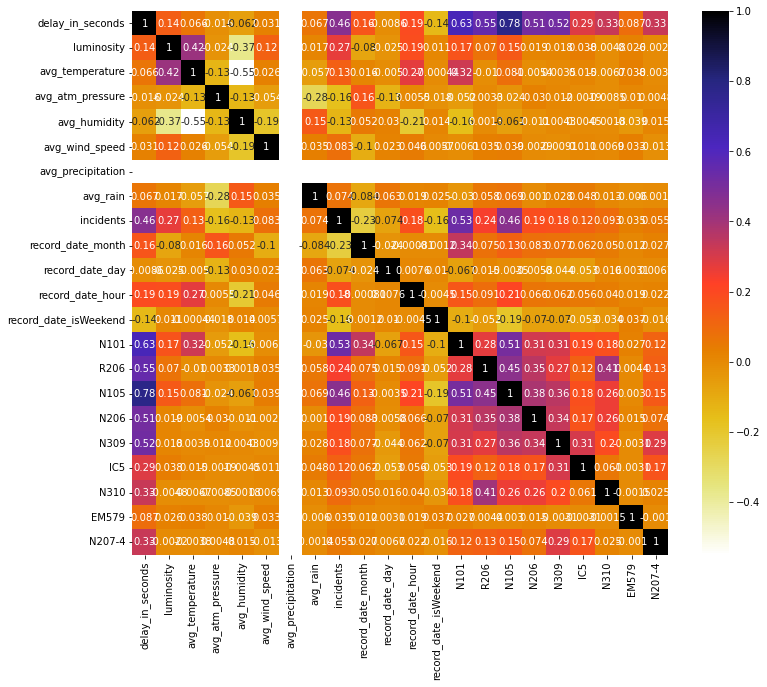

In [130]:
cor = trainDf.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

Write down transformed DS

In [131]:
trainDf.to_csv('training_data_treated.csv',index=False)
testDf.to_csv('test_data_treated.csv',index=False)